# Projeto DIVINO
## Regressão Logística

#### Load Data and Preparation

In [1]:
import pandas as pd
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegressionCV
from ipynb.fs.full.data_analiser import *
from ipynb.fs.full.wine_functions import *

pd.set_option("display.precision", 2)
modelDescription = "Regressão Logística"

In [2]:
# Load Data
data = load_data(True);
target_variable, classifier_variables, classes = get_target_and_classifier_and_classes_variables(data)
classifier_variables

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

### Validação Cruzada

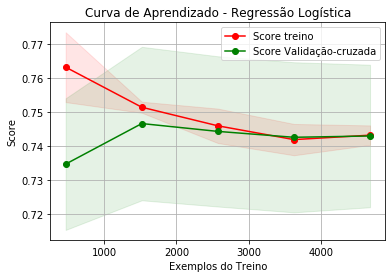

In [3]:
Xtrain, Xtest, Ytrain, Ytest, cvfold = validacao_cruzada(data, target_variable, classifier_variables)
scorer = metrics.make_scorer(metrics.accuracy_score)
estimator = LogisticRegressionCV(Cs=10, cv=cvfold, random_state = 0)
exibir_curva_de_aprendizado(modelDescription, estimator, scorer, Xtrain, Ytrain, cvfold)

### Treinando o Modelo

In [4]:
model_pipe = treinar_modelo(StandardScaler(), estimator, Xtrain, Ytrain)
model_pipe

/Users/edprata/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(memory=None,
         steps=[('Scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('Model',
                 LogisticRegressionCV(Cs=10, class_weight=None,
                                      cv=StratifiedKFold(n_splits=10, random_state=0, shuffle=False),
                                      dual=False, fit_intercept=True,
                                      intercept_scaling=1.0, l1_ratios=None,
                                      max_iter=100, multi_class='warn',
                                      n_jobs=None, penalty='l2', random_state=0,
                                      refit=True, scoring=None, solver='lbfgs',
                                      tol=0.0001, verbose=0))],
         verbose=False)

### Aplicação do Modelo na Massa de Teste

In [5]:
Yhat, Ypred = aplicar_modelo(model_pipe, Xtest)

Yhat.shape: (1300,)


### Distribuição:

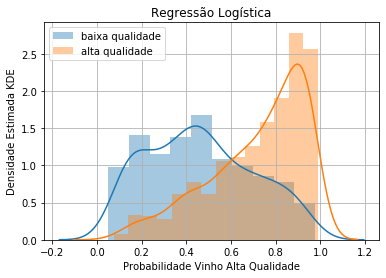

In [6]:
exibir_distribuicao(modelDescription, classes, Yhat, Ytest)

### Curva ROC

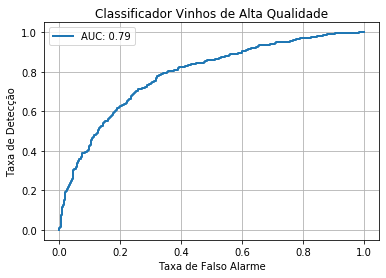

In [7]:
exibirCurvaRoc('Classificador Vinhos de Alta Qualidade', Ytest, Yhat)

### Matriz de Confusão

In [8]:
exibirMatrixDeConfusao(Ytest, Ypred, classes)

,Model baixa qualidade,Model alta qualidade,Real Total
Real baixa qualidade,307,170,477
Real alta qualidade,164,659,823
Model Total,471,829,1300


### Classification Report 

In [9]:
print(metrics.classification_report(Ytest, Ypred, target_names=classes))

                 precision    recall  f1-score   support

baixa qualidade       0.65      0.64      0.65       477
 alta qualidade       0.79      0.80      0.80       823

       accuracy                           0.74      1300
      macro avg       0.72      0.72      0.72      1300
   weighted avg       0.74      0.74      0.74      1300

